# PCA ggplot

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
from scientisttools import load_decathlon2
X = load_decathlon2()
X.head()

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle,Discus,Pole.vault,Javeline,X1500m,Rank,Points,Competition
rownames,,,,,,,,,,,,,
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar
ZSIVOCZKY,11.13,7.30,13.48,2.01,48.62,14.17,45.67,4.42,55.37,268.0,7,8004,Decastar


In [3]:
from scientisttools import PCA
res_pca = PCA(standardize=True,n_components=None,ind_sup=list(range(23,X.shape[0])),quanti_sup=[10,11],quali_sup=12,parallelize=True)
res_pca.fit(X)

PCA(ind_sup=[23, 24, 25, 26], n_components=None, parallelize=True, quali_sup=12,
    quanti_sup=[10, 11])

## Individuals Factor Map

### RGB color

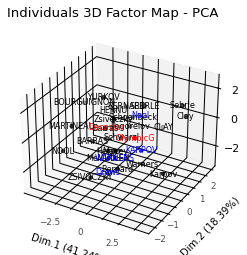

In [4]:
from scientisttools import fviz_pca3d_ind
p = fviz_pca3d_ind(res_pca)
print(p)

### Color by Cos2

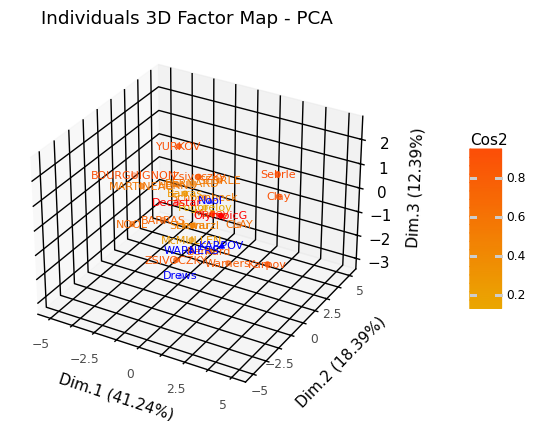

In [5]:
p = fviz_pca3d_ind(res_pca,color="cos2",repel=False,x_lim=(-5,5),y_lim=(-5,5))
print(p)

### Color by contrib

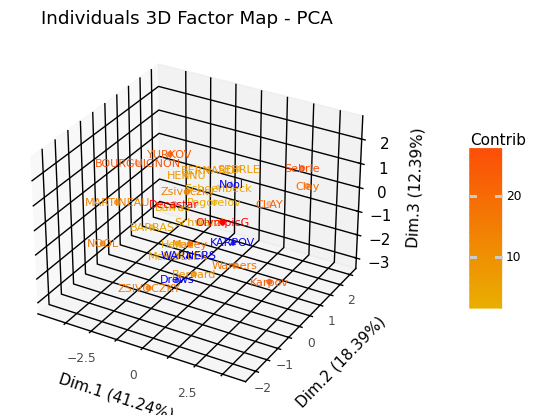

In [6]:
p = fviz_pca3d_ind(res_pca,color="contrib",repel=False)
print(p)

### Color by quantitatives columns

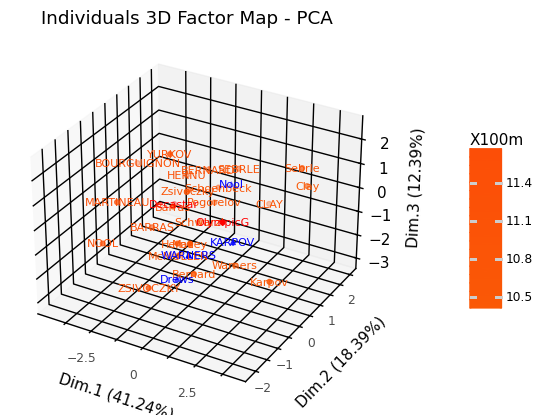

In [7]:
p = fviz_pca3d_ind(res_pca,color=X.columns.tolist()[0],repel=True)
print(p)

### Color by supplementary quantitatives columns

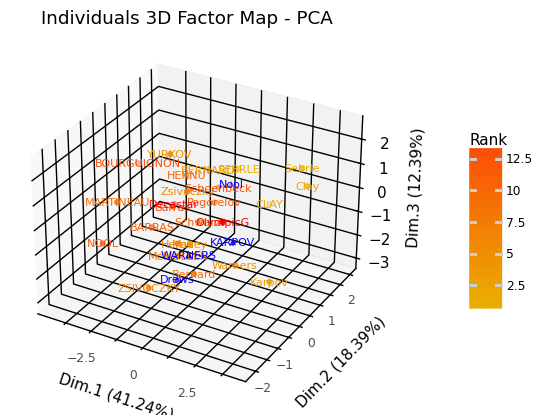

In [8]:
p = fviz_pca3d_ind(res_pca,color=X.columns.tolist()[10],repel=True)
print(p)

### Color by qualitatives columns

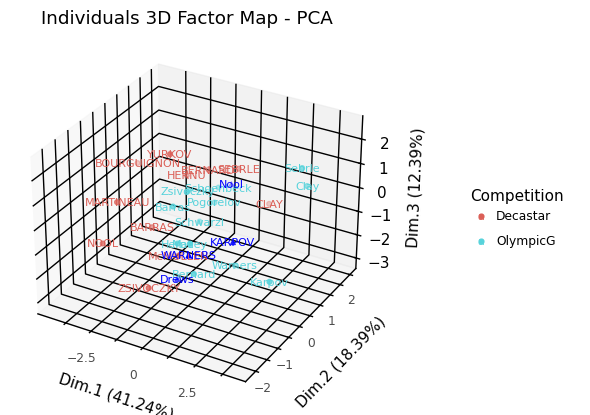

In [9]:
p = fviz_pca3d_ind(res_pca,habillage=X.columns.tolist()[-1],repel=True)
print(p)

### Color by numpy array

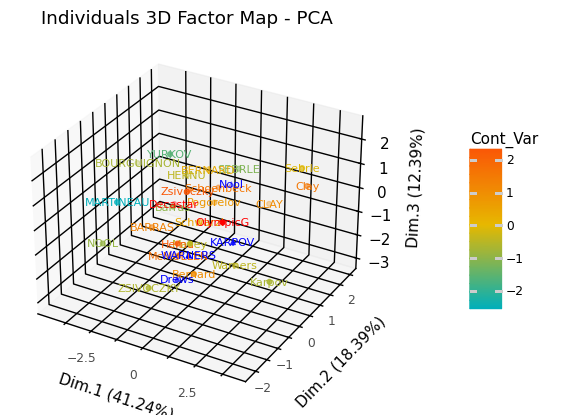

In [10]:
import numpy as np
np.random.seed(123)
color_numpy = np.random.normal(size=res_pca.call_["X"].shape[0])
p = fviz_pca3d_ind(res_pca,color=color_numpy,repel=True)
print(p)

### Color buy kmeans clustering

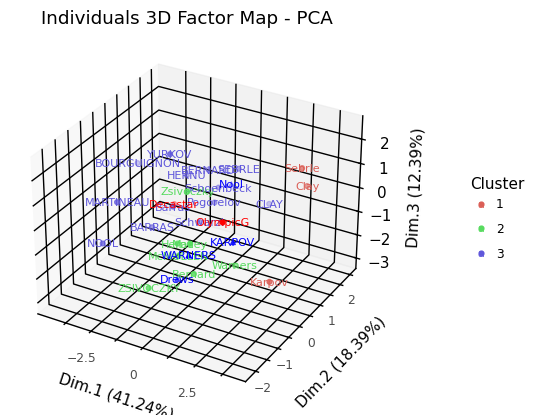

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_pca.ind_["coord"])
p = fviz_pca3d_ind(res_pca,color=kmeans,repel=True)
print(p)

### Set limits

#### limit with cos2

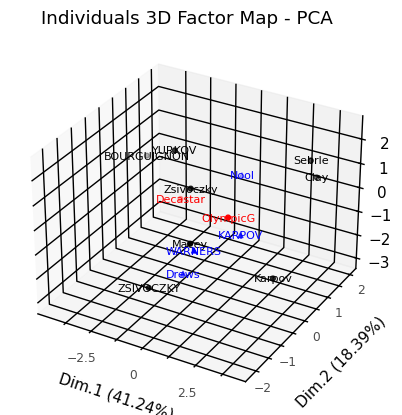

In [12]:
p = fviz_pca3d_ind(res_pca,lim_cos2=0.8,repel=True)
print(p)

#### Limit with contrib

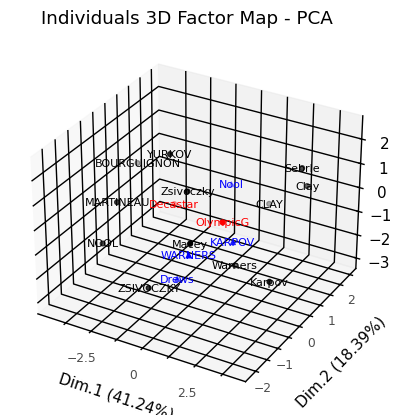

In [13]:
p = fviz_pca3d_ind(res_pca,lim_contrib=10,repel=True)
print(p)